In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import seaborn as sns
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import traceback
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats.stats as stats
import re
import traceback
import string
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas.core.algorithms as algos
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
from xgboost import XGBClassifier

In [2]:
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(8,4), 
    'axes.facecolor': 'white',
    'axes.grid': True, 'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1.5)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

In [3]:
data =pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Missing Values**
The dataset had a few columns that had a few missing values. Embarked had two missing Values, while column Age and Cabin had 177 and 687 missing values respectively.


In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count() * 100
percent_round = round(percent_1,1).sort_values(ascending=False)
missing_data = pd.concat([total,percent_round],axis=1, keys=['Total','%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


Text(0.5, 1.0, 'Missing Values Heatmap')

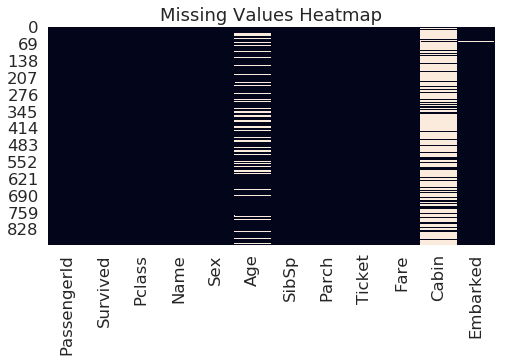

In [8]:
data.isnull().sum()
sns.heatmap(data.isnull(),cbar=False).set_title("Missing Values Heatmap")

**Data Understanding**

In [9]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Sex**

We also convert male and female to categorical variables.

In [10]:
data['Sex'] = data['Sex'].astype('category')
data['Sex'] = data['Sex'].cat.codes

**SURVIVED**
More than 60% of the passengers on the ship did not survive the accident.

0    549
1    342
Name: Survived, dtype: int64

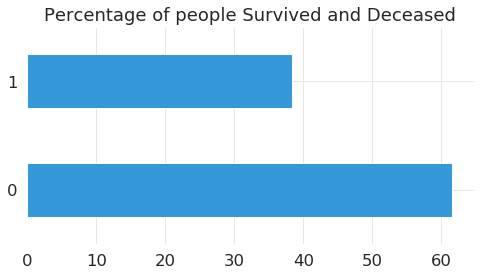

In [11]:
(data.Survived.value_counts(normalize=True)*100).plot.barh().set_title("Percentage of people Survived and Deceased")
data.Survived.value_counts()

**SEX**
Around 65% of the passengers were male and the rest were female. However the percentage of female survivors were more than male.

1    577
0    314
Name: Sex, dtype: int64

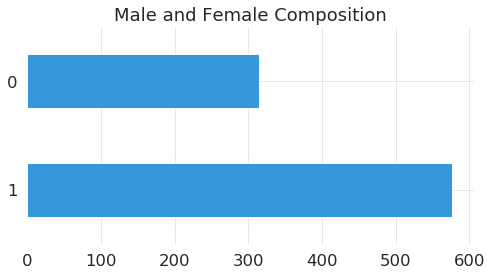

In [12]:
data.Sex.value_counts().plot.barh().set_title("Male and Female Composition")
data.Sex.value_counts()

[]

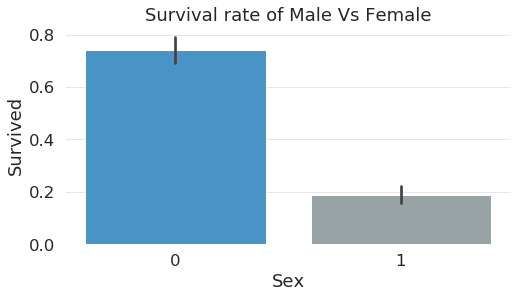

In [13]:
sns.barplot(x='Sex',y='Survived',data=data)
plt.title("Survival rate of Male Vs Female")
plt.plot()

3    491
1    216
2    184
Name: Pclass, dtype: int64

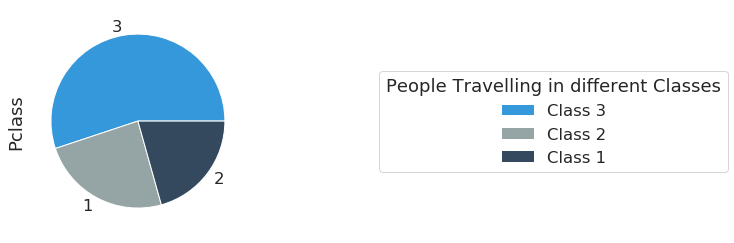

In [14]:
fig_pclass=data.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 2","Class 1"], loc= 'center right',bbox_to_anchor=(3.25, 0.5)).set_title("People Travelling in different Classes")
data.Pclass.value_counts()

Text(0.5, 1.0, 'Training Data - Percentage of people survived on the basis of class')

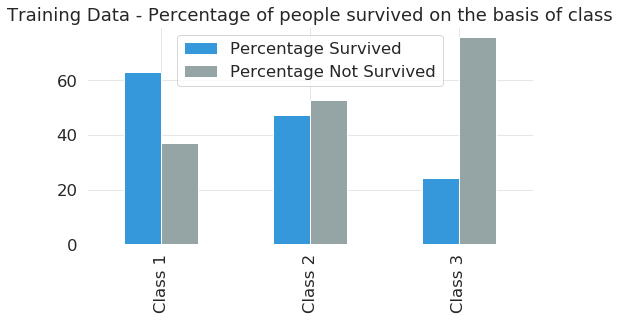

In [15]:
pclass_1_survivor_distribution = round((data[data.Pclass == 1].Survived == 1).value_counts()[1]/len(data[data.Pclass == 1]) * 100, 2)
pclass_2_survivor_distribution = round((data[data.Pclass == 2].Survived == 1).value_counts()[1]/len(data[data.Pclass == 2]) * 100, 2)
pclass_3_survivor_distribution = round((data[data.Pclass == 3].Survived == 1).value_counts()[1]/len(data[data.Pclass == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    { "Percentage Survived":{"Class 1": pclass_1_survivor_distribution,"Class 2": pclass_2_survivor_distribution, "Class 3": pclass_3_survivor_distribution},  
     "Percentage Not Survived":{"Class 1": 100-pclass_1_survivor_distribution,"Class 2": 100-pclass_2_survivor_distribution, "Class 3": 100-pclass_3_survivor_distribution}})
pclass_perc_df.plot.bar().set_title("Training Data - Percentage of people survived on the basis of class")

Embarked
Embarked signifies where the traveler boarded from. There are three possible values for Embark - Southampton,Cherbourg,Queenstown.

In combined data, more than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.

More People who boarded from Cherbourg survived than those who died

/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


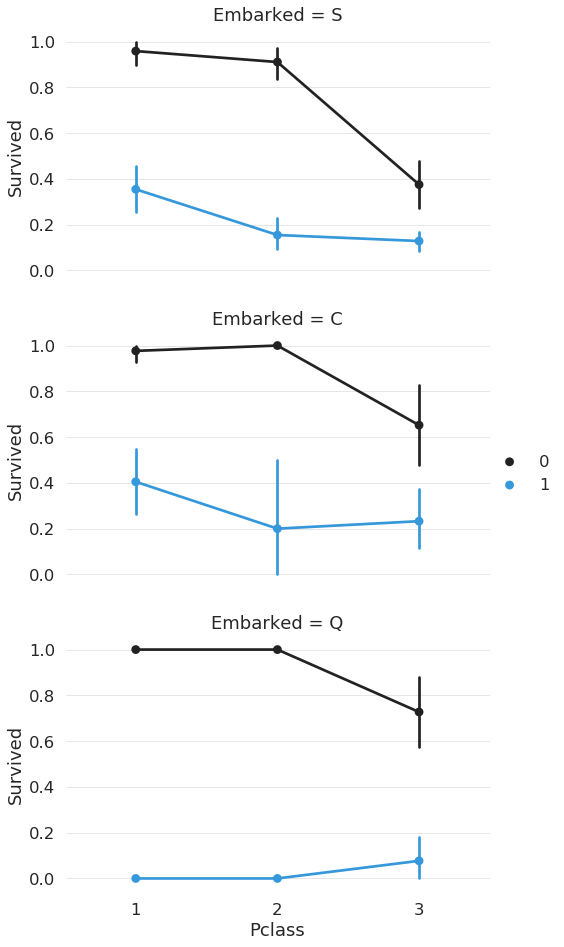

In [16]:
facetgrid = sns.FacetGrid(data, row='Embarked', size=4.5,aspect=1.6)
facetgrid.map(sns.pointplot,'Pclass','Survived','Sex' )
facetgrid.add_legend()

In [17]:
pd.DataFrame(data.Age.describe())

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


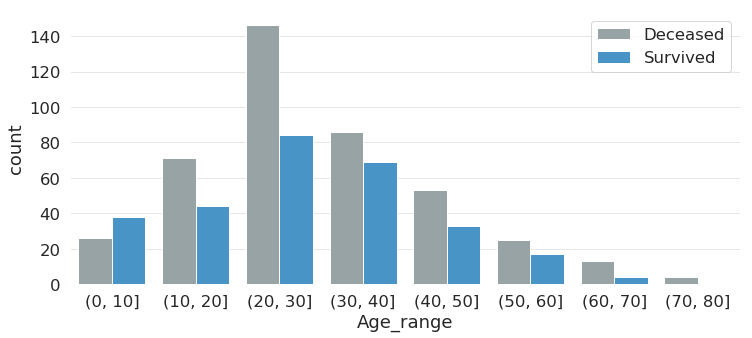

In [18]:
data['Age_range']=pd.cut(data['Age'],[0,10,20,30,40,50,60,70,80])
plt.figure(figsize=(12,5))
sns.countplot(x='Age_range',hue='Survived',data=data,palette=["C1","C0"]).legend(labels=["Deceased","Survived"])


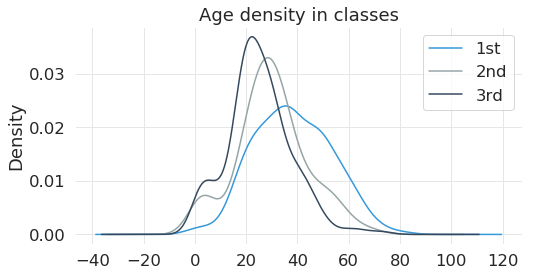

In [19]:
for x in [1,2,3]:    ## for 3 classes
    data.Age[data.Pclass == x].plot(kind="kde")
plt.title("Age density in classes")
plt.legend(("1st","2nd","3rd"))

/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


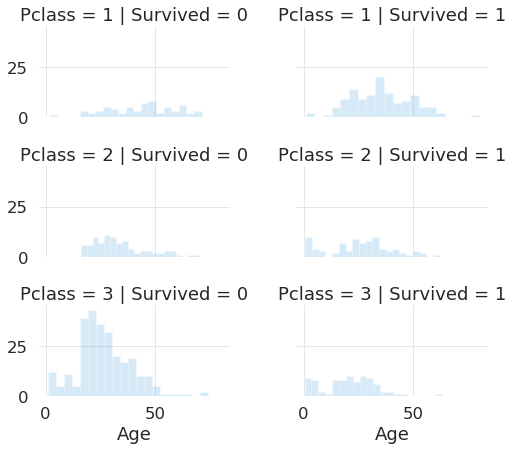

In [20]:
grid=sns.FacetGrid(data,col='Survived',row='Pclass', size=2.2,aspect=1.6)
grid.map(plt.hist,'Age', alpha=0.2,bins=20)
grid.add_legend()

**Sibsp and Parch**

These two fields are similar. Parch stands for parents or children travelling onboard with them.Sibsp stands for total number of siblings and spouse travelling onboard. We can merge these two fields to form a single field called **Relatives**

Clearly surivalrates for people with 0-3 relatives was the highest. 


In [21]:
data['Relatives']= data['SibSp'] + data['Parch']


/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


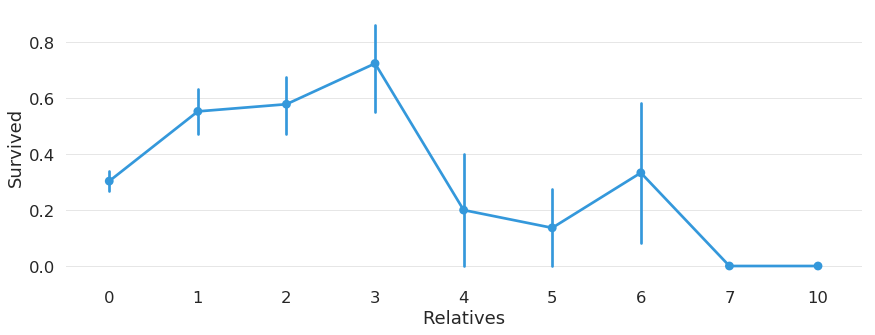

In [22]:
sns.factorplot('Relatives','Survived',data=data,aspect=2.5)

**Data Correlation**

The heatmap tells us the relative correlation between each of the parameters.
As evident there is a very strong correlation between Survived and Pclass and Fare.


[Text(0.5, 0, 'PassengerId'),
 Text(1.5, 0, 'Survived'),
 Text(2.5, 0, 'Pclass'),
 Text(3.5, 0, 'Sex'),
 Text(4.5, 0, 'Age'),
 Text(5.5, 0, 'SibSp'),
 Text(6.5, 0, 'Parch'),
 Text(7.5, 0, 'Fare'),
 Text(8.5, 0, 'Relatives')]

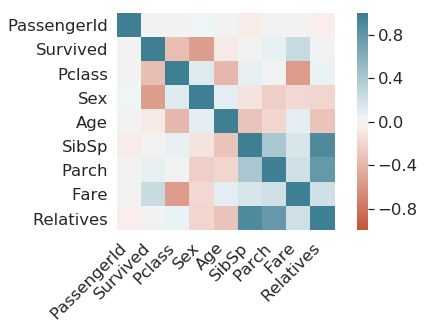

In [23]:
corr= data.corr()
ax=sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
     ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'

)



**Data Transformation**

**Fare and Cabin**

Since Fare is the total fare for everyone in a particular reservation, it is better to compute fare_per_head and create a new paramter.

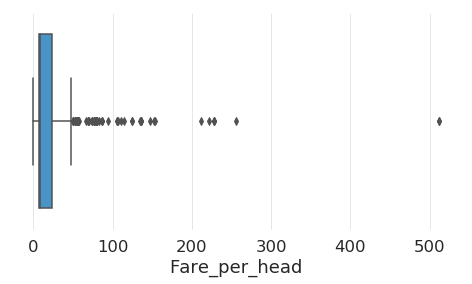

In [24]:
data['Fare_per_head'] = data['Fare']/(data['Relatives'] + 1)
data['Fare'].describe()
data['Fare_per_head'] = data['Fare']/(data['Relatives'] + 1)
data['Fare_per_head'] = data['Fare_per_head'].fillna(0)
sns.boxplot(x=data['Fare_per_head'])

**Cabin**

Since there are many missing values for Cabin, we replace them with  "U". Also Since Cabin has many different values, we create a new parameter called Deck, which contains just the first character of the Cabin.

In [25]:
data['Cabin'] = data['Cabin'].fillna("U")
data['Deck']=data['Cabin'].str[:1]
print(data['Deck'].value_counts())

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64


**Data Imputation**

**Age**

Looking at the values in Age parameter, 28 is the median value for age and hence we will fill all the missing Age columns with 28.

In [26]:
print(data.Age.describe())


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [27]:
data.Age.fillna(data.Age.mode()[0],inplace=True)

**Embarked** 

Since S is the most common value for embarked, we fill the two missing values with Embarked

In [28]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace = True)

In [30]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**Outlier Values Treatment**

We now need to examine the outliers in our data which may skew our results. We need to determine what is the best value to replace them with. 

**Age**

From the below graph, it is evident that there are a few outliers here. We determine values which have a zcore more than 3 and replace them with a value with zscore around 3.

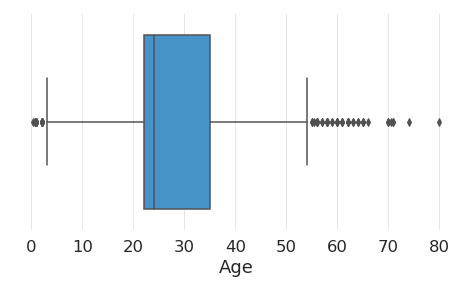

In [31]:
sns.boxplot(x=data['Age'])
data['Age'].fillna(28,inplace=True)

In [32]:
from scipy import stats
z=stats.zscore(data['Age'])
print(np.where((z>3) | (z < -3)))
print(np.where((z > 2.8) & (z < 3)))

(array([ 96, 116, 493, 630, 672, 745, 851]),)
(array([33]),)


In [33]:
print(data['Age'][[ 96, 116, 493, 630, 672, 745, 851]])
print(data['Age'][33])

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
66.0


In [34]:
#Since z score value around 2.8 is 66, we replace z score value > 3 with 66
data['Age'][[ 96, 116, 493, 630, 672, 745, 851]] =66

/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


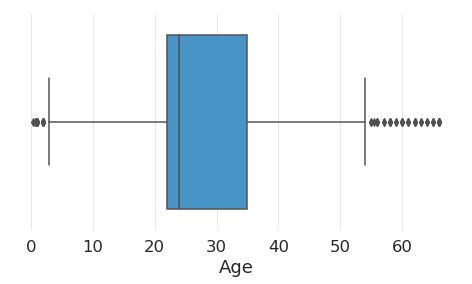

In [35]:
sns.boxplot(x=data['Age'])

**Fare Per Head**

We repeat the same excercise from above here. We determine values which have a zcore more than 3 and replace them with a value with zscore around 3.

(array([195, 258, 269, 325, 337, 373, 380, 527, 557, 609, 679, 708, 716,
       730, 737]),)
(array([118, 299]),)


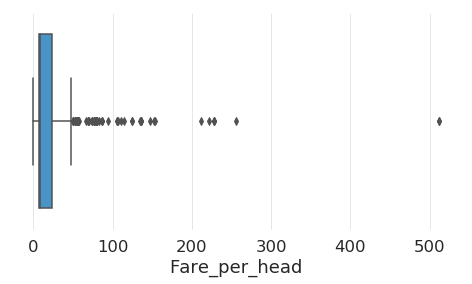

In [36]:
sns.boxplot(x=data['Fare_per_head'])
z1=stats.zscore(data['Fare_per_head'])
print(np.where((z1>3) | (z1 < -3)))
print(np.where((z1 > 2.8) & (z1 < 3.1)))

In [37]:
print(data['Fare_per_head'][[195, 258, 269, 325, 337, 373, 380, 527, 557, 609, 679, 708, 716,
       730, 737]])
print(data['Fare_per_head'][[118, 299]])
print(data['Fare_per_head'].describe())

195    146.5208
258    512.3292
269    135.6333
325    135.6333
337    134.5000
373    135.6333
380    227.5250
527    221.7792
557    227.5250
609    153.4625
679    256.1646
708    151.5500
716    227.5250
730    211.3375
737    512.3292
Name: Fare_per_head, dtype: float64
118    123.7604
299    123.7604
Name: Fare_per_head, dtype: float64
count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: Fare_per_head, dtype: float64


In [38]:
data['Fare_per_head'][[195, 258, 269, 325, 337, 373, 380, 527, 557, 609, 679, 708, 716,
       730, 737]] = 123.7604

/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


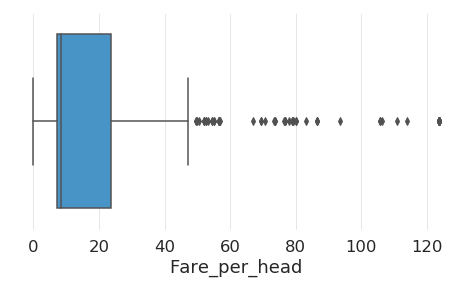

In [39]:
sns.boxplot(x=data['Fare_per_head'])

**Data Preparation**

**Pclass**

Since the machine considers 3 > 2 > 1, which is quite opposite to our assumption in Pclasses, we interchange 3 and 1 classes.

In [40]:
data['Pclass'].loc[data['Pclass']==3] = 4
data['Pclass'].loc[data['Pclass']==1]=3
data['Pclass'].loc[data['Pclass']==4]=1
    

/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


**Dummy Variable creation to remove continuous variables**

Since Age, Relatives and Fare_per head are continous variable, we need to create dummy variables by binning the Age values and then creating dummy variables out of them.

In [41]:
data['Age_bins']=pd.qcut(data['Age'],4,labels=['Age_0_15','Age_15_30','Age_30_45','Age_45_60'],duplicates='drop')
data.Age_bins.value_counts()

Age_0_15     231
Age_15_30    223
Age_30_45    220
Age_45_60    217
Name: Age_bins, dtype: int64

In [42]:
data['Relatives_bins']=pd.qcut(data['Relatives'],6,labels=['rel_0','rel_1-3','rel_3_plus'],duplicates='drop')
data.Relatives_bins.value_counts()

rel_0         698
rel_1-3       102
rel_3_plus     91
Name: Relatives_bins, dtype: int64

In [43]:
data['Fare_per_head_bins']=pd.qcut(data['Fare_per_head'],5,labels=['fare_0_10','fare_10_20','fare_20_30','fare_30_40','fare_40_plus'])
data.Fare_per_head_bins.value_counts()

fare_10_20      192
fare_0_10       179
fare_30_40      178
fare_20_30      173
fare_40_plus    169
Name: Fare_per_head_bins, dtype: int64

**Removing Redundant columns**

We need to remove PassengerId, Ticket,Cabin, Fare, Age, Fare_per_head,Relatives, Sibsp,Age_bins,Relatives_bins, Fare_per_head_bins

In [44]:
Age_dummies=pd.get_dummies(data['Age_bins'],drop_first=True,prefix='Age')
Relatives_dummies=pd.get_dummies(data['Relatives_bins'],drop_first=True,prefix='Relatives')
Fare_dummies=pd.get_dummies(data['Fare_per_head_bins'],drop_first=True,prefix='Fare')
data= pd.concat([Age_dummies,Relatives_dummies,Fare_dummies,data],axis=1)
data.columns

Index(['Age_Age_15_30', 'Age_Age_30_45', 'Age_Age_45_60', 'Relatives_rel_1-3',
       'Relatives_rel_3_plus', 'Fare_fare_10_20', 'Fare_fare_20_30',
       'Fare_fare_30_40', 'Fare_fare_40_plus', 'PassengerId', 'Survived',
       'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Age_range', 'Relatives', 'Fare_per_head', 'Deck',
       'Age_bins', 'Relatives_bins', 'Fare_per_head_bins'],
      dtype='object')

In [45]:
data.drop(['Fare_per_head','Relatives','Age','Cabin','PassengerId','Ticket','Name','SibSp','Parch','Fare','Age_range','Relatives_bins','Fare_per_head_bins','Age_bins'],axis=1,inplace=True)

In [46]:
data_Y =data['Survived']
data.drop('Survived',inplace=True,axis=1)
data.head()

,Age_Age_15_30,Age_Age_30_45,Age_Age_45_60,Relatives_rel_1-3,Relatives_rel_3_plus,Fare_fare_10_20,Fare_fare_20_30,Fare_fare_30_40,Fare_fare_40_plus,Pclass,Sex,Embarked,Deck
0,0,0,0,0,0,0,0,0,0,1,1,S,U
1,0,0,1,0,0,0,0,0,1,3,0,C,C
2,0,1,0,0,0,0,1,0,0,1,0,S,U
3,0,1,0,0,0,0,0,1,0,3,0,S,C
4,0,1,0,0,0,0,1,0,0,1,1,S,U


**Label Encoding and One Hot Encding to remove all the categorical values**

In [47]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
data['Embarked']=labelenc.fit_transform(data['Embarked'])
data['Deck']=labelenc.fit_transform(data['Deck'])
data.head()

,Age_Age_15_30,Age_Age_30_45,Age_Age_45_60,Relatives_rel_1-3,Relatives_rel_3_plus,Fare_fare_10_20,Fare_fare_20_30,Fare_fare_30_40,Fare_fare_40_plus,Pclass,Sex,Embarked,Deck
0,0,0,0,0,0,0,0,0,0,1,1,2,8
1,0,0,1,0,0,0,0,0,1,3,0,0,2
2,0,1,0,0,0,0,1,0,0,1,0,2,8
3,0,1,0,0,0,0,0,1,0,3,0,2,2
4,0,1,0,0,0,0,1,0,0,1,1,2,8


In [48]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(categorical_features = [11,12])
data=onehotencoder.fit_transform(data).toarray()
data = pd.DataFrame(data)
data.head()

/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


**Splitting the data into training and testing set and preparing it to be fed into the Machine Learning algorithms.**

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(data,data_Y,test_size=0.3,random_state=42)

# **Information Value Analysis**

We now need to calculate the information value of all the parameters and remove the columns with an information value more than 0.8.

In [50]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = str((re.findall(r"[\w']+", vars_name))[-1])
    
    x = df1.dtypes.index
    
    count = -1
    for i in x:
        if str(i).upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)


In [52]:
final_iv, IV = data_vars(X_train, Y_train)
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]


/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: divide by zero encountered in log
/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log


**Variance Inflation Factor**

We need to identify the parameters which have a Variance Inflation Factor greater than 5 and remove them.

In [53]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
  count = 0
  while max_vif > vif_threshold:
    count += 1
    print("Iteration # "+str(count))
    vif = pd.DataFrame()
    vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    if vif['VIFactor'].max().round(1) > vif_threshold:
      print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max().round(1)))
      df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
      max_vif = vif['VIFactor'].max().round(1)
    else:
        print('Complete')
        return df, vif.sort_values('VIFactor').round(1)
X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1
Removing 21 with VIF of 12.600000
Iteration # 2
Removing 11 with VIF of 10.300000
Iteration # 3
Complete


In [54]:
X_train=final_df
X_train.head()

,0,2,4,5,6,7,8,12,15,17,18,20
445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
650,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
450,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [55]:
final_vif

,VIFactor,features
6,1.0,8
5,1.1,7
8,1.2,15
4,1.2,6
7,1.3,12
2,1.4,4
9,1.5,17
10,1.5,18
0,1.6,0
3,1.6,5


In [56]:
X_test=X_test[X_train.columns]
X_test.head()

,0,2,4,5,6,7,8,12,15,17,18,20
709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
439,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
840,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
720,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Machine Learning**

In [57]:
#Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score,confusion_matrix
from sklearn.metrics import precision_recall_curve,roc_curve

**Logistic Regression**

We first run logistic regression on the given testing and training set and observe the results.

In [121]:
def run_regression_accuracy(X_train, Y_train, X_test, Y_test):
  logreg = LogisticRegression()
  logreg.fit(X_train, Y_train)
  y_pred = logreg.predict(X_test)
  print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))
  cm = confusion_matrix(Y_test, y_pred)
  print('\nConfusion matrix: \n',cm)

  print('\nClassification report: \n',classification_report(Y_test, y_pred))

  logit_roc_auc = roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
  fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])

  plt.figure()
  plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
  
  return logreg

/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.65

Confusion matrix: 
 [[135  22]
 [ 73  38]]

Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.86      0.74       157
           1       0.63      0.34      0.44       111

   micro avg       0.65      0.65      0.65       268
   macro avg       0.64      0.60      0.59       268
weighted avg       0.64      0.65      0.62       268



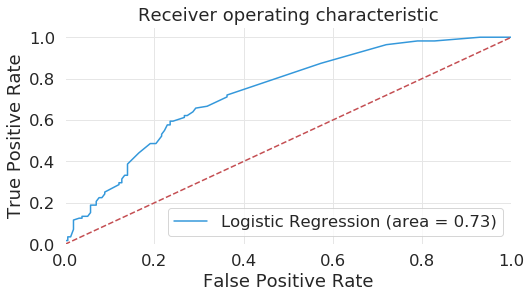

In [122]:
logreg = run_regression_accuracy(X_train, Y_train,X_test,Y_test)

**Random Forest Classifier**

We then run Random Forest Classifier on the given testing and training set and observe the results.

Accuracy of Random Forest Classifier on test set: 0.67

Confusion matrix: 
 [[125  32]
 [ 56  55]]

Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       157
           1       0.63      0.50      0.56       111

   micro avg       0.67      0.67      0.67       268
   macro avg       0.66      0.65      0.65       268
weighted avg       0.67      0.67      0.66       268



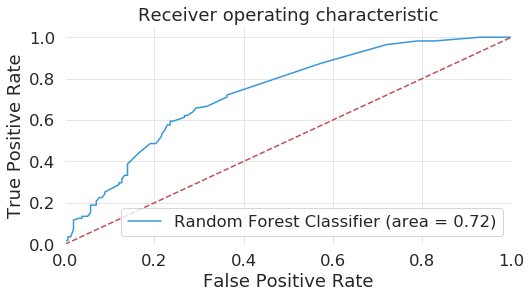

In [120]:

def run_rfc_accuracy(X_train, Y_train,X_test,Y_test):
  rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
  rf.fit(X_train, Y_train)
  y_pred = rf.predict(X_test)
  print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(rf.score(X_test, Y_test)))
  cm = confusion_matrix(Y_test, y_pred)
  print('\nConfusion matrix: \n',cm)

  print('\nClassification report: \n',classification_report(Y_test, y_pred))
  y_score=rf.fit(X_train, Y_train).predict_proba(X_test)
  
  rf_roc_auc  = roc_auc_score(Y_test, y_score[:,1])
  
  fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])

  plt.figure()
  plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('RandomForestClassifier')
  plt.show()
  
  return rf
rf = run_rfc_accuracy(X_train, Y_train,X_test,Y_test)


**XGBoost**

We then run XGboost classifier on the given testing and training set and observe the results.

Accuracy of XGBoost on test set: 0.66

Confusion matrix: 
 [[137  20]
 [ 70  41]]

Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.66      0.75       207
           1       0.37      0.67      0.48        61

   micro avg       0.66      0.66      0.66       268
   macro avg       0.62      0.67      0.61       268
weighted avg       0.76      0.66      0.69       268

0.7454811499397487
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


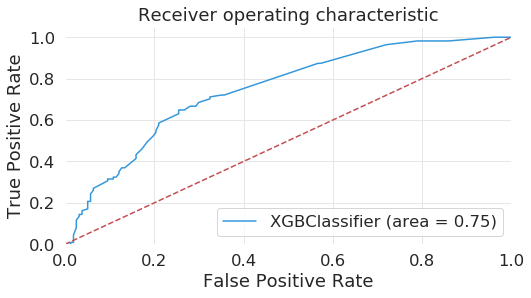

In [125]:
def run_xgb_accuracy(X_train, Y_train,X_test,Y_test):
  xg_cls = XGBClassifier()
  xg_cls.fit(X_train,Y_train)
  preds = xg_cls.predict(X_test)
  print('Accuracy of XGBoost on test set: {:.2f}'.format(xg_cls.score(X_test, Y_test)))
  cm = confusion_matrix(Y_test, preds)
  print('\nConfusion matrix: \n',cm)

  print('\nClassification report: \n',classification_report(preds, Y_test))
  y_score=xg_cls.predict_proba(X_test)
  
  rf_roc_auc  = roc_auc_score(Y_test, y_score[:,1])
  print(rf_roc_auc)
  fpr, tpr, thresholds = roc_curve(Y_test, y_score[:,1])
  print(xg_cls.get_params())
  plt.figure()
  plt.plot(fpr, tpr, label='XGBClassifier (area = %0.2f)' % rf_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('XGBClassifier')
  plt.show()
  
  return xg_cls
rf = run_xgb_accuracy(X_train, Y_train,X_test,Y_test)


From the above results it is evident that XGBoost classifier performs the best with ROC area under the cure=75%.
We continue with the hyperparameter tuning to find  optimal paramters for better results.

**Hyper Parameter Tuning**

In [143]:
from sklearn.model_selection import GridSearchCV
param_grid={
        'gamma': [0,0.5, 1],
        'subsample': [0.4,0.6, 0.8,1],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3,4,5,6],
        'base_score': [0.5,0.6]
        }

xgb2 = XGBClassifier()
clf=GridSearchCV(estimator=xgb2,param_grid=param_grid)
clf.fit(X_train,Y_train)

/Users/deepikasridhar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0, 0.5, 1], 'subsample': [0.4, 0.6, 0.8, 1], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5, 6], 'base_score': [0.5, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [144]:
clf.best_params_

{'base_score': 0.6,
 'colsample_bytree': 1.0,
 'gamma': 0,
 'max_depth': 6,
 'subsample': 0.8}

Using the best params values above in the next section, we run XGBoost classifier again.

In [146]:
xgboost=XGBClassifier(base_score=0.6,
 colsample_bytree=1,
 gamma= 0,
 max_depth= 6,
 min_child_weight=1,
 subsample=0.8 )
preds=xgboost.fit(X_train,Y_train).predict_proba(X_test)
rf_roc_auc  = roc_auc_score(Y_test, preds[:,1])
print(rf_roc_auc)

0.7414643943306364


Since this does not alter the results significantly, we conclude that XGBoost classifier gives a result of 75% ROC score and the best classifer for this problem.

**Confusion Matrix**



In [147]:
confusion_matrix(Y_test, XGBClassifier().fit(X_train,Y_train).predict(X_test))

array([[137,  20],
       [ 70,  41]])

The first row is about the not-survived-predictions: 136 passengers were correctly classified as not survived (called true negatives) and 21 were wrongly classified as not survived (false positives).
    
The second row is about the survived-predictions: 67 passengers were wrongly classified as survived (false negatives) and 44 where correctly classified as survived (true positives).
    



**Precision Recall Curve**
Precision is the number of true positives divided by the total number of elements labelled as positive. Recall is the number of true positives divided by the total number of elements which were actually positive.

We plot a Precision Recall curve to study the output of the classifier

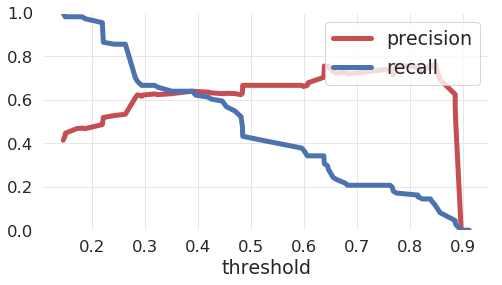

<Figure size 1008x504 with 0 Axes>

In [136]:
#Precision recall curve
from inspect import signature
precision,recall,threshold = precision_recall_curve(Y_test,y_score[:,1])
plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
plt.xlabel("threshold", fontsize=19)
plt.legend(loc="upper right", fontsize=19)
plt.ylim([0, 1])
plt.figure(figsize=(14, 7))
plt.show()


As you can see, Recall is rapidly falling at a precision greater than 0.6, so we can choose precsion and recall tradeoff at around 60%





**F-Score**

We can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [148]:
from sklearn.metrics import f1_score
f1score=f1_score(Y_test,y_score[:,1].round())
f1score

0.5111111111111111

**ROC Curve**

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances).

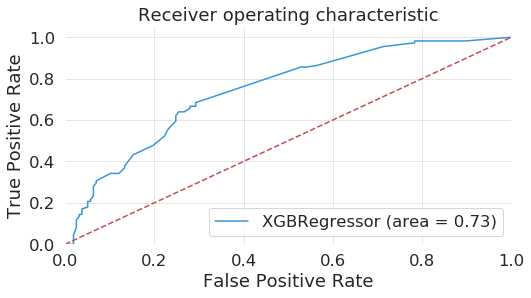

In [138]:
  fpr, tpr, thresholds = roc_curve(Y_test, y_score[:,1])

  plt.figure()
  plt.plot(fpr, tpr, label='XGBRegressor (area = %0.2f)' % rf_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('XGBRegressor')
  plt.show()
  

The red line in the middle represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our XGBoost model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.



**ROC Score**

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.
A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [139]:
r_a_score = roc_auc_score(Y_test, y_score[:,1])
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.7431284787972686


**Conclusion**

